# Cohort 3 Pinch Test

In [1]:
from trial_class import Trial

In [2]:
single_recording_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Cohort 3\Code_Test\Experiment_Folder\nn8-250113-125130"
behavior_csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Cohort 3\Code_Test\Behavior_Folder\nn8-250113-125130.csv"

In [3]:
t1 = Trial(single_recording_path)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Cohort 3\Code_Test\Experiment_Folder\nn8-250113-125130\Notes.txt
read from t=0s to t=422.34s


Preprocessing

In [4]:
t1.remove_initial_LED_artifact(t=30)
# t1.remove_final_data_segment(t = 10)
t1.smooth_and_apply(window_len=int(t1.fs)*1)
t1.apply_ma_baseline_correction()
t1.align_channels()
t1.compute_dFF()
t1.compute_zscore()
t1.verify_signal()

Extract Manual Annotations from Boris aggregated csv

In [5]:
t1.extract_manual_annotation_behaviors(behavior_csv_path)
t1.combine_consecutive_behaviors(behavior_name='all', bout_time_threshold=2, min_occurrences=1)
t1.remove_short_behaviors(behavior_name='all', min_duration=0.05)

[192.1, 263.7, 348.6]
Behavior 'Pinch' stored with onsets: [192.1, 263.7, 348.6]


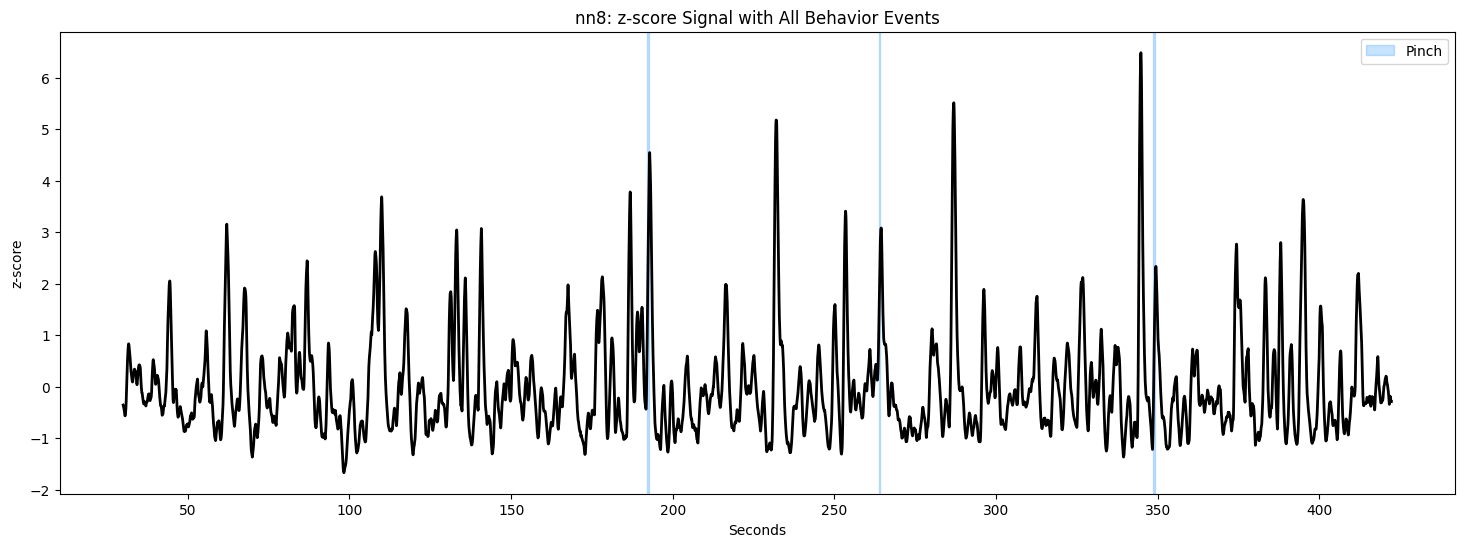

In [6]:
t1.plot_behavior_event(behavior_name='all')